# 🎯 xPts vs Actual Points – Bayer Leverkusen (Bundesliga 2018/19)
This notebook simulates Bayer Leverkusen’s match outcomes using shot-by-shot xG via Monte Carlo simulations, and compares expected points (xPts) to actual points earned throughout the season.

In [10]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath("scripts"))
from scripts.visualiser import plot_cumulative_pts_comparison, plot_xpts_vs_actual_per_match
from scripts.data_fetcher import get_leverkusen_shots, get_actual_points_for_leverkusen, get_actual_points_for_leverkusen
from scripts.xpts_model import simulate_season

In [5]:
shots_df = get_leverkusen_shots()
actual_pts_df = get_actual_points_for_leverkusen()

C:\Users\44773\AppData\Roaming\Python\Python311\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\44773\AppData\Roaming\Python\Python311\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\44773\AppData\Roaming\Python\Python311\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\44773\AppData\Roaming\Python\Python311\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\44773\AppData\Roaming\Python\Python311\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\44773\AppData\Roaming\Python\Python311\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credenti

In [6]:
xpts_df = simulate_season(shots_df, n_simulations=10000)
xpts_df.head()

Simulating season: 100%|██████████| 34/34 [00:00<00:00, 186.73it/s]


,match_id,team,xPts
0,3895052,Bayer Leverkusen,1.1941
1,3895052,RB Leipzig,1.5442
2,3895060,Bayer Leverkusen,2.5357
3,3895060,Borussia Mönchengladbach,0.3313
4,3895067,Bayer Leverkusen,2.8234


In [7]:
actual_pts_df = get_actual_points_for_leverkusen()

actual_pts_df.head()

C:\Users\44773\AppData\Roaming\Python\Python311\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,team,Pts
0,3895302,Bayer Leverkusen,3
1,3895292,Bayer Leverkusen,3
2,3895333,Bayer Leverkusen,3
3,3895340,Bayer Leverkusen,3
4,3895348,Bayer Leverkusen,3


In [11]:
merged = pd.merge(xpts_df, actual_pts_df, on=["match_id", "team"])
print("Merged shape:", merged.shape)
print(merged.head())

Merged shape: (34, 4)
   match_id              team    xPts  Pts
0   3895052  Bayer Leverkusen  1.1941    3
1   3895060  Bayer Leverkusen  2.5357    3
2   3895067  Bayer Leverkusen  2.8234    3
3   3895074  Bayer Leverkusen  1.3829    1
4   3895086  Bayer Leverkusen  2.9500    3


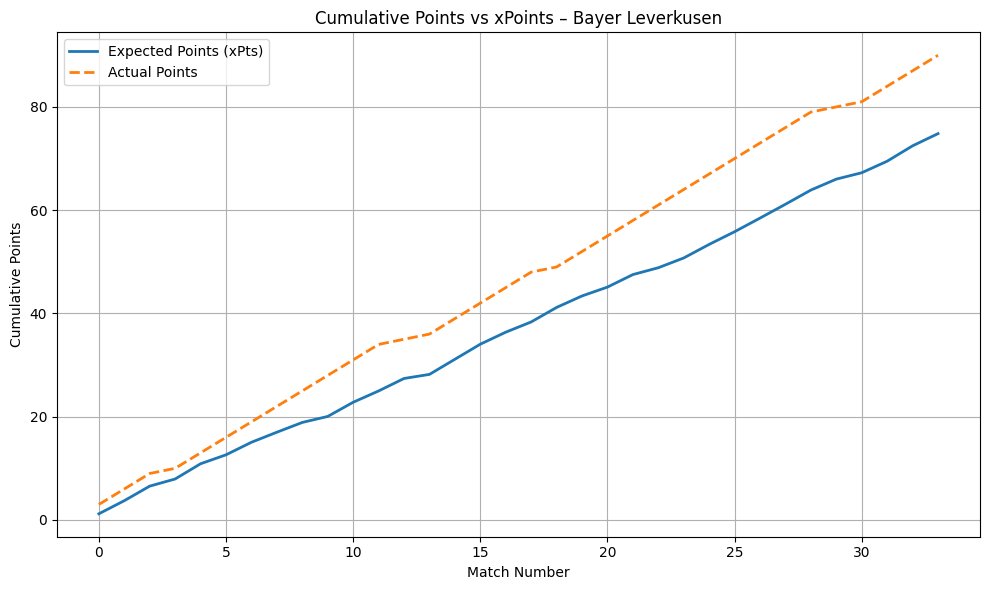

In [13]:
plot_cumulative_pts_comparison(xpts_df, actual_pts_df, team_name="Bayer Leverkusen")